# Reading data into Python

### The data has one file "Advertising.csv". This file contains 1000 rows and 10 columns

# Data Description
* Daily Time Spent on Site : The amount of time  that a user spends on the  website where the ad is displayed
* Ag : The age of the user who interacted with the advertisement.e
* Area Incom : The income level of the geographical area where the user is locatede
* Daily Internet Usag : The amount of time, in minutes, that a user spends on the  internet dailye
* Ad Topic Li : The topic or content of the advertisement that the user interacted with.
* e	Ci :  The city of residence of the userty
* Ma :  Binary variable indicating the gender of the user (1 for male, 0 for female)le
* Count :  The country in which the user is located.ry
* Timesta :  The timestamp indicating when the user interacted with the  advertisementmp
* Clicked on : The target variable indicating whether the user clicked on the ad (1 for  clicked, 0 for not clicked).Ad


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd


In [3]:
ad_click= pd.read_csv("advertising.csv")
ad_click.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
#Unique elements in data
ad_click.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [6]:
#lets find any duplicates data are there in the data or not
print("elements before dropping duplicate elements",ad_click.shape)

ad_click=ad_click.drop_duplicates()
print("elements after dropping duplicate elements",ad_click.shape)

#hence we can conclude that there are no duplicates

elements before dropping duplicate elements (1000, 10)
elements after dropping duplicate elements (1000, 10)


# Defining The problem Statement

In [7]:
ad_click.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

### Create a Predictive model which can tell if a person will click the advertisement or not?
* Target Variable = Clicked on Ad
* Predictors : Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country','Timestamp'
* Clicked on Ad = 1
* Not_clicked= 0

# Determining the type of Machine Learning
### Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable

<Axes: xlabel='Clicked on Ad'>

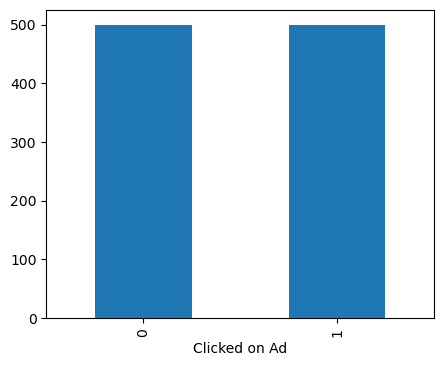

In [8]:
%matplotlib inline
groupdata=ad_click.groupby("Clicked on Ad").size()
groupdata.plot(kind="bar",figsize=(5,4))

# Basic Data Exploration

In [9]:
ad_click.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
ad_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [11]:
ad_click.describe(include="all")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


### Dividing the data into continuous or categorical for further analysis

* Clicked on Ad : Categorical <b>Target Variable</b>
* Daily Time Spent on Site : Continuous
* Age : Continuous
* Area income : Continuous
* Daily interent Usage : Continuous
* Male : Categorical
* Ad Topic line : Categorical
* city : categorical
* Country :Categorical
* Timestamp : Continuous


# Removing unnecessary columns


# Visual Exploratory Data Analysis

* Categorical Variale: Bar chart
* continuous variable : Histogram

<Axes: xlabel='Male'>

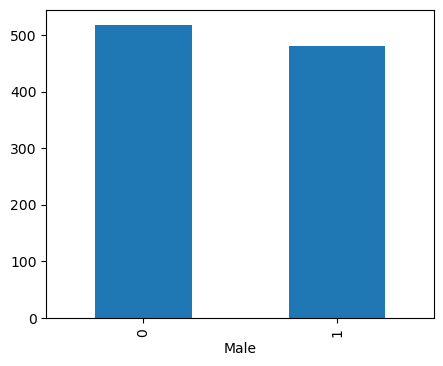

In [44]:
%matplotlib inline
groupdata=ad_click.groupby("Male").size()
groupdata.plot(kind="bar",figsize=(5,4))

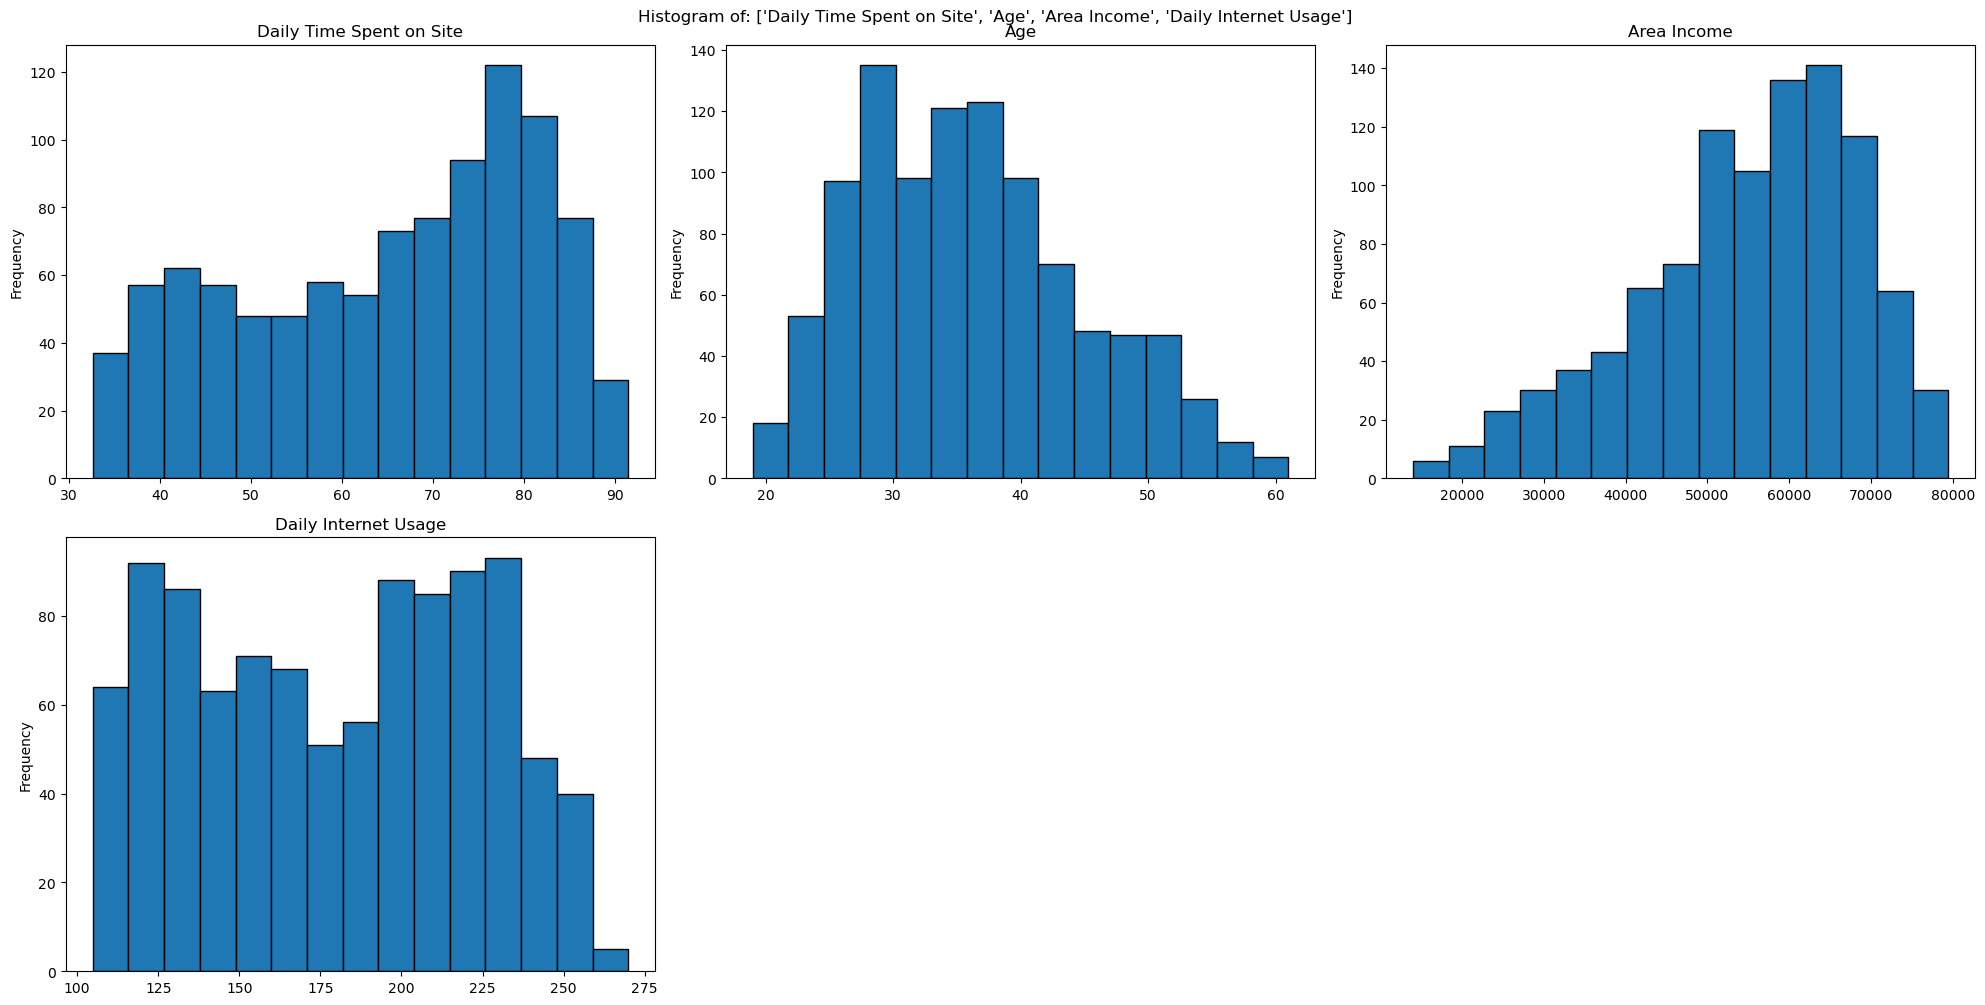

In [42]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
    fig.suptitle('Histogram of: ' + str(colsToPlot))

    # Flatten the subplot array for easy indexing
    subPlot = subPlot.flatten()

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData[colName].plot(kind='hist', ax=subPlot[plotNumber], bins=15, edgecolor='black')
        subPlot[plotNumber].set_title(colName)

    # Hide unused subplots
    for i in range(len(colsToPlot), len(subPlot)):
        subPlot[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Calling the function
PlotBarCharts(
    inpData=ad_click,
    colsToPlot=['Daily Time Spent on Site', 'Age', 'Area Income', 
                'Daily Internet Usage']
)


# Histogram Interpretation

#### The above graph we can see that y= Number of vlues in that range.,
* Daily time spent on site they are between 80
* Age it lies between 30
* Area income is around 70k

<h2>Selected COntinuous variable are:</h2>
* Daily time spent
* Age
* Daily interent usage
* Area Income

# Outlier treatment

In [ ]:
ad_click["Daily Time Spent on Site"][ad_click[Daily Time Spent on Site]>

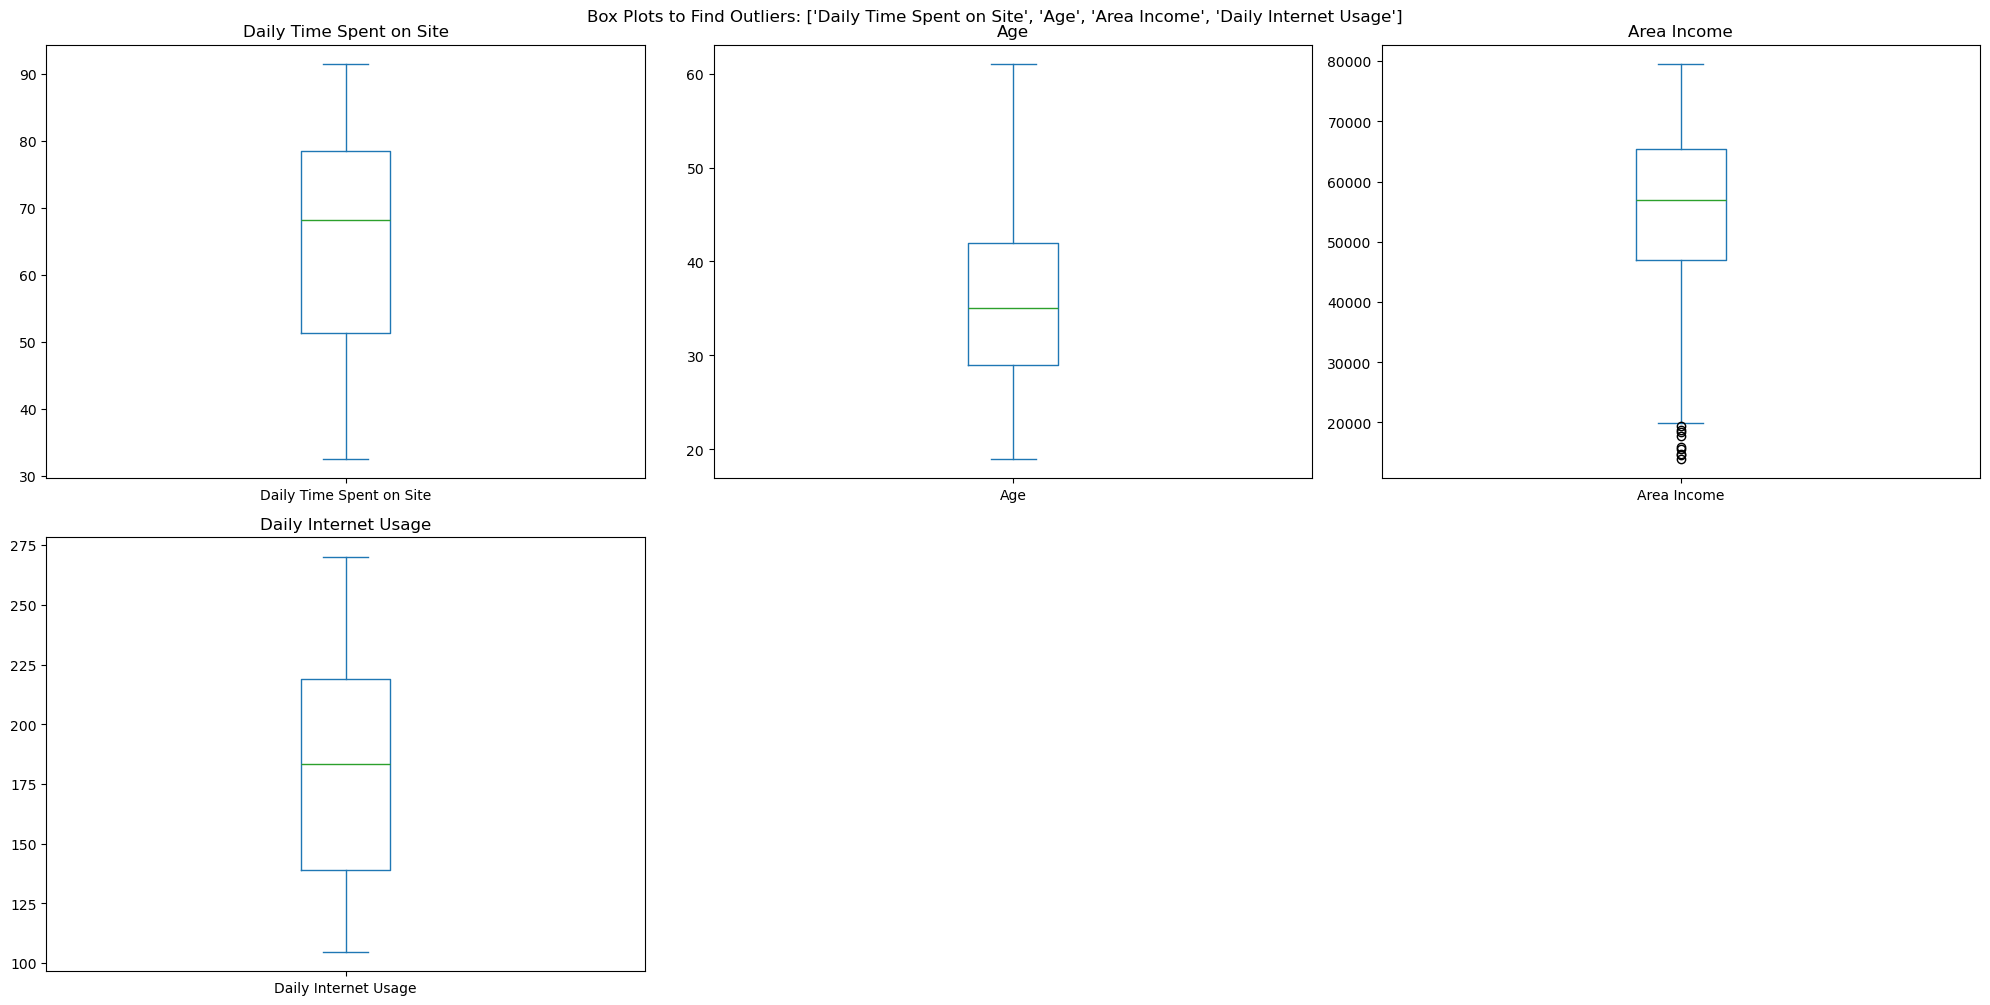

In [46]:
def PlotBoxPlots(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
    fig.suptitle('Box Plots to Find Outliers: ' + str(colsToPlot))

    # Flatten the subplot array for easy indexing
    subPlot = subPlot.flatten()

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData[colName].plot(kind='box', ax=subPlot[plotNumber])
        subPlot[plotNumber].set_title(colName)

    # Hide unused subplots
    for i in range(len(colsToPlot), len(subPlot)):
        subPlot[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
PlotBoxPlots(
    inpData=ad_click,
    colsToPlot=['Daily Time Spent on Site', 'Age', 'Area Income', 
                'Daily Internet Usage']  # Ensure these columns are numerical
)


In [56]:
ad_click[ad_click['Area Income'] < 20000].shape[1]


10

In [50]:
k

Daily Time Spent on Site    10
Age                         10
Area Income                 10
Daily Internet Usage        10
Ad Topic Line               10
City                        10
Male                        10
Country                     10
Timestamp                   10
Clicked on Ad               10
dtype: int64

# Releationship Exploration Categorical vs continuous -Box Plot

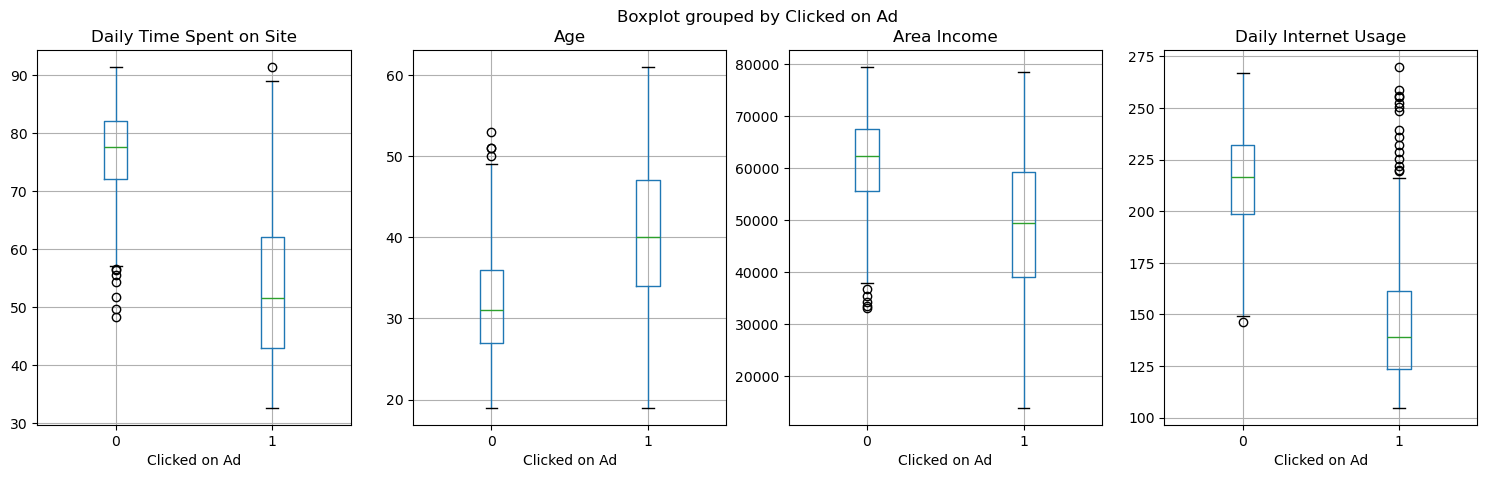

In [57]:
# Box plots for Categorical Target Variable "Clicked on Ad" and continuous predictors
ContinuousColsList=['Daily Time Spent on Site', 'Age', 'Area Income', 
                'Daily Internet Usage']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    ad_click.boxplot(column=PredictorCol, by='Clicked on Ad', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Releationship Between Categorical vs Categorical Grouped Bar chart

In [59]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=ad_click['Male'], columns=ad_click['Clicked on Ad'])
CrossTabResult

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Contingency Table:
Clicked on Ad    0    1
Male                   
0              250  269
1              250  231


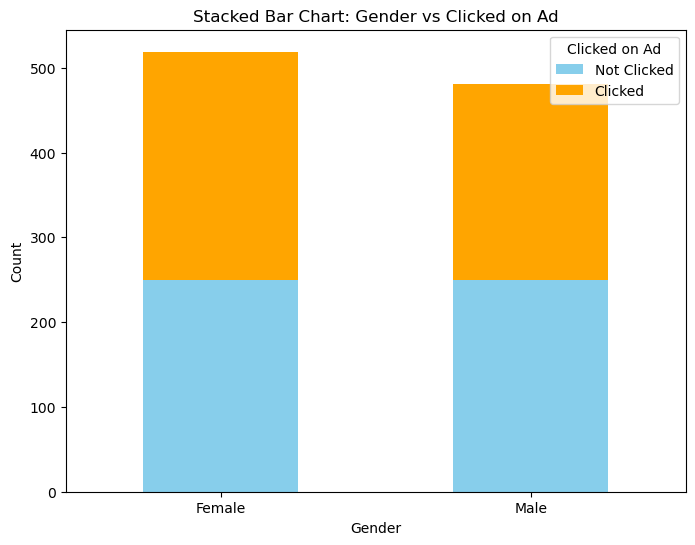

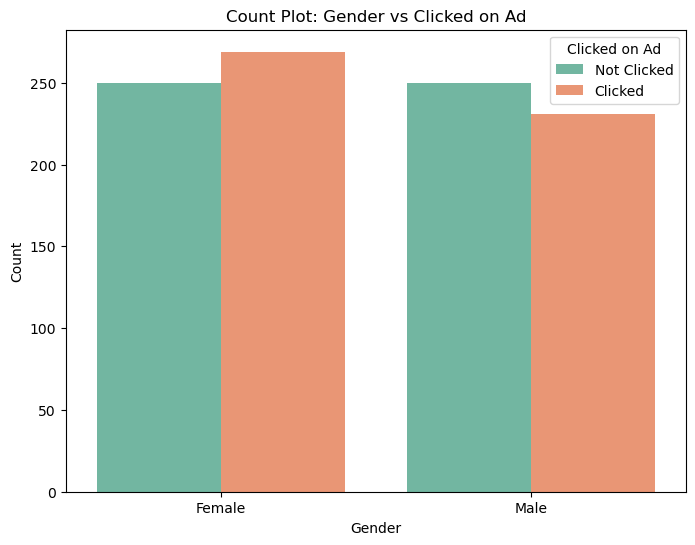

In [62]:
import seaborn as sns
contingency_table = pd.crosstab(index=ad_click['Male'], columns=ad_click['Clicked on Ad'])

print("Contingency Table:")
print(contingency_table)

# Rename index for clarity (0: Female, 1: Male)
contingency_table.index = ['Female', 'Male']

# Stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Stacked Bar Chart: Gender vs Clicked on Ad')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'], loc='upper right')
plt.show()

# Count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(
    data=ad_click, 
    x='Male', 
    hue='Clicked on Ad', 
    palette='Set2'
)
plt.title('Count Plot: Gender vs Clicked on Ad')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])  # Set x-ticks for gender
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'], loc='upper right')
plt.show()

# Statistical Feature Selection Categorical vs Continuous using Anova Test

#### Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [63]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Daily Time Spent on Site', 'Age', 'Area Income', 
                'Daily Internet Usage']
FunctionAnova(inpData=ad_click, TargetVariable='Clicked on Ad', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Daily Time Spent on Site is correlated with Clicked on Ad | P-Value: 5.8773842441386545e-180
Age is correlated with Clicked on Ad | P-Value: 3.1298083092905155e-62
Area Income is correlated with Clicked on Ad | P-Value: 9.44958341282883e-58
Daily Internet Usage is correlated with Clicked on Ad | P-Value: 3.8932341225400295e-211


['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
#### Chi-Square test is conducted to check the correlation between two categorical variables

In [71]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

CategoricalVariables=['Male','City','Country','Ad Topic Line','Month']

# Calling the function
FunctionChisq(inpData=ad_click, 
              TargetVariable='Clicked on Ad',
              CategoricalVariablesList= CategoricalVariables)

Male is NOT correlated with Clicked on Ad | P-Value: 0.2546019035670961
City is NOT correlated with Clicked on Ad | P-Value: 0.43395559179296606
Country is NOT correlated with Clicked on Ad | P-Value: 0.7737565395501936
Ad Topic Line is NOT correlated with Clicked on Ad | P-Value: 0.48513148927490146
Month is NOT correlated with Clicked on Ad | P-Value: 0.9172816839796131


[]

In [68]:

ad_click['Timestamp'] = pd.to_datetime(ad_click['Timestamp'])

# Create a new column 'Month' to extract the month from 'Timestamp'
ad_click['Month'] = ad_click['Timestamp'].dt.month


In [70]:
# Display the first 5 rows of the DataFrame to check the new 'Month' column
print(ad_click.head())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad  Month  
0 2016-03-27 00:53:11              0      3  
1 2016-04-04

### Finally Selected Continuous Variable are
* Daily Time Spent on Site, 
* Age
* Area Income
* Daily Internet Usage

# Selecting final predictors for Machine Learning

In [80]:
SelectedColumns=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']

# Selecting final columns
DataForML=ad_click[SelectedColumns]
DataForML.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [81]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Machine Learning Spliting the data into Training and Testing

In [82]:
# Printing all the column names for our reference
DataForML.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')

In [83]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked on Ad'
Predictors=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']

# Demonstration for deployment with final cols
Predictors=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [84]:
X_train[0:4]

array([[7.836000e+01, 2.400000e+01, 5.892044e+04, 1.967700e+02],
       [4.118000e+01, 4.300000e+01, 4.186655e+04, 1.292500e+02],
       [8.249000e+01, 4.500000e+01, 3.864540e+04, 1.308400e+02],
       [3.500000e+01, 4.000000e+01, 4.603373e+04, 1.512500e+02]])

In [85]:
y_train[0:4]

array([0, 1, 1, 1], dtype=int64)

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Logistic Regression
clf = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Fit the model on the training data
LOG = clf.fit(X_train, y_train)

# Make predictions on the testing data
prediction = LOG.predict(X_test)

# Measuring accuracy on testing data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# 10-Fold Cross validation
Accuracy_Values = cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, prediction)
print("\nConfusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       154
           1       0.99      0.95      0.97       146

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[153   1]
 [  7 139]]
Accuracy of the model on Testing Sample Data: 0.97

Accuracy values for 10-fold Cross Validation:
 [1.         0.969997   0.969997   0.94987469 1.         0.979992
 0.969997   0.929993   0.96997298 0.93997599]

Final Average Accuracy of the model: 0.97

Confusion Matrix:
 [[153   1]
 [  7 139]]


# # Decision Trees

DecisionTreeClassifier(max_depth=6)
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       154
           1       0.96      0.92      0.94       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

[[148   6]
 [ 12 134]]
Accuracy of the model on Testing Sample Data: 0.94

Accuracy values for 10-fold Cross Validation:
 [0.989999   0.929993   0.929993   0.93978322 0.95998399 0.979992
 0.949995   0.91996799 0.949995   0.93997599]

Final Average Accuracy of the model: 0.95


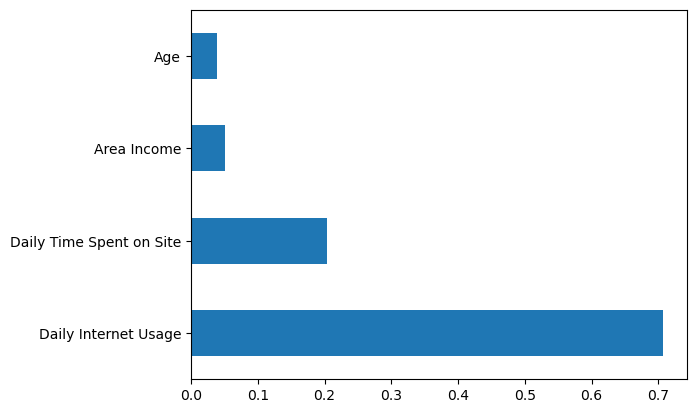

In [89]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

RandomForestClassifier(max_depth=6)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       154
           1       0.98      0.95      0.96       146

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[151   3]
 [  8 138]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [1.         0.929993   0.949995   0.9599359  0.96997298 0.979992
 0.96       0.94       0.96997298 0.93997599]

Final Average Accuracy of the model: 0.96


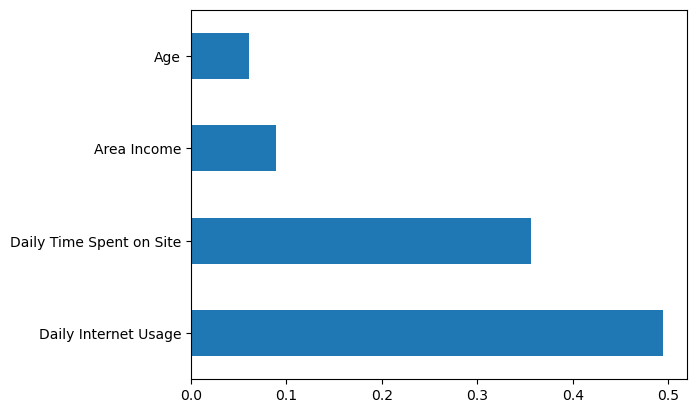

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6)

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF = clf.fit(X_train, y_train)

# Make predictions on the testing data
prediction = RF.predict(X_test)

# Measuring accuracy on testing data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Running 10-Fold Cross validation on the Random Forest model
Accuracy_Values = cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Conclusion

In This Project i have used 
* Logistic Regression Model in which i got an accuracy of <b>0.97</b>,
* Decission Tree accuarcy is <b>0.95</b>
* Random Forest accuracy is <b>0.96</b>

Logistic Regression Model works well for this Project